In [10]:
# Imports
import numpy as np
import os
from matplotlib import pyplot as plt
import h5py as h5
from PyXRIM.Corrections import Corrector
from PyXRIM.misc import  bin_ndarray
from functions import *
from decompFunctions import *
%matplotlib notebook

In [11]:
#Inputs
fname = 'D:\Libraries\Documents\Materials Informatics\LiCoO2_Al2O3_20160330.hdf5'
datasets = ['S026','S027','S028'] # name of raw dataset
procRefName = 'bkg_corrected' # reference name to append to rawData

In [12]:
# open h5file
f = h5.File(fname, mode='r') 
# Always open in read mode 'r'.
# Until you're ready to write into the file. This is especially true if your OS is not Unix-based like Windows.
rawg = f['20160330/Raw']
procg = f['20160330/Process']
meta = f['20160330/Meta']

In [13]:
roi1x=slice(250,640)
roi1y=slice(510,900)  #original 1024

#roi1x=slice(0,1024)
#roi1y=slice(0,1024)  #original 1024


i = 0;
for name in datasets:
    rawDset = rawg[name]
    procDset = f[rawDset.attrs['bkg_corrected']]   

    if i == 0:
        #data = procDset[:,:,:]
        data = procDset[:,roi1x,roi1y]
        datalog = procDset[:,roi1x,roi1y]+10
    
        twotheta = rawDset.attrs['delta']
        
        i = 1
    else:
        #data = np.vstack([data, procDset[:,:,:]])
        data = np.vstack([data, procDset[:,roi1x,roi1y]])
        datalog = np.vstack([datalog, procDset[:,roi1x,roi1y]+10])

        twotheta = np.hstack([twotheta,rawDset.attrs['delta']])
        

In [14]:
##Insert DELETE CODE
delete = [0]

data_new = np.vstack([data[1:25,:,:],data[42:88,:,:]])
datalog_new = np.vstack([datalog[1:25,:,:],datalog[42:88,:,:]])
twotheta_new = np.hstack([twotheta[1:25],twotheta[42:88]])

print data_new.shape
print datalog_new.shape
print twotheta_new.shape

(70L, 390L, 390L)
(70L, 390L, 390L)
(70L,)


<IPython.core.display.Javascript object>


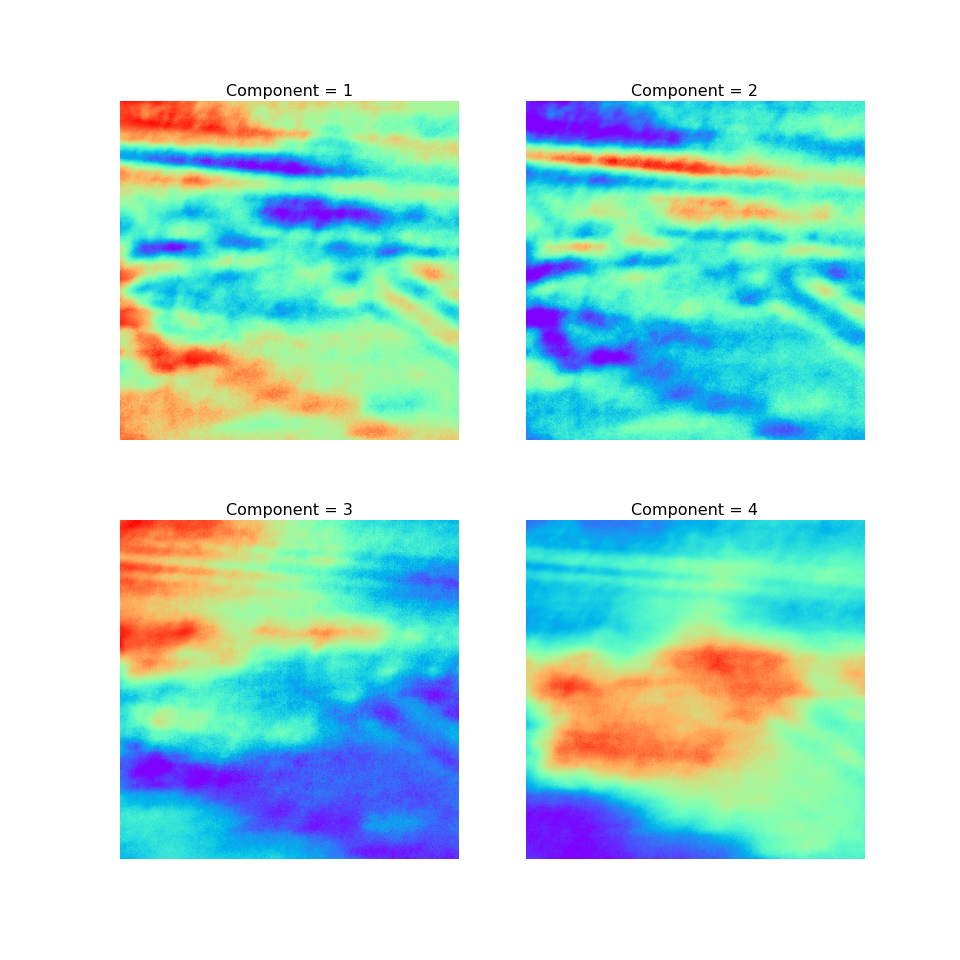

<IPython.core.display.Javascript object>


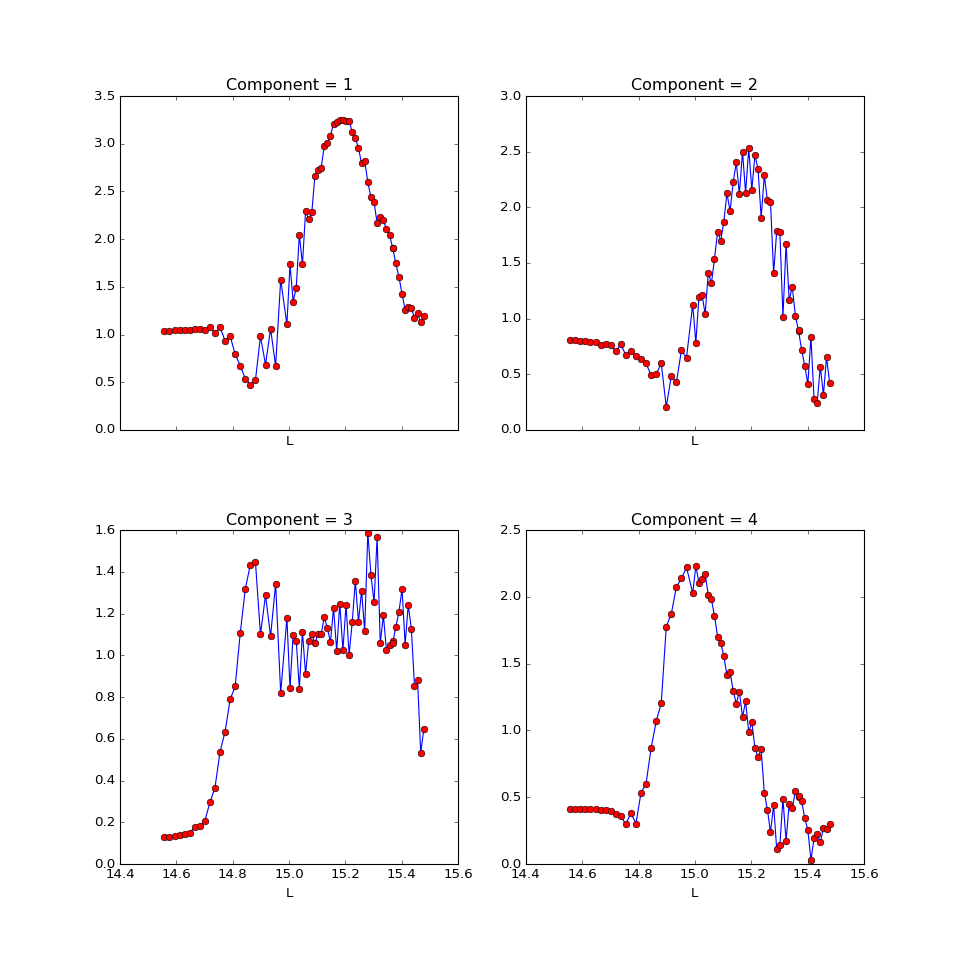

In [15]:
# Same as before, except now use NMF
n_comp = 4
projec, eigenvec, nmf = doNMF(datalog_prep, n_comp, xvals=xvals,xlabel='L',cmap='rainbow')

<IPython.core.display.Javascript object>


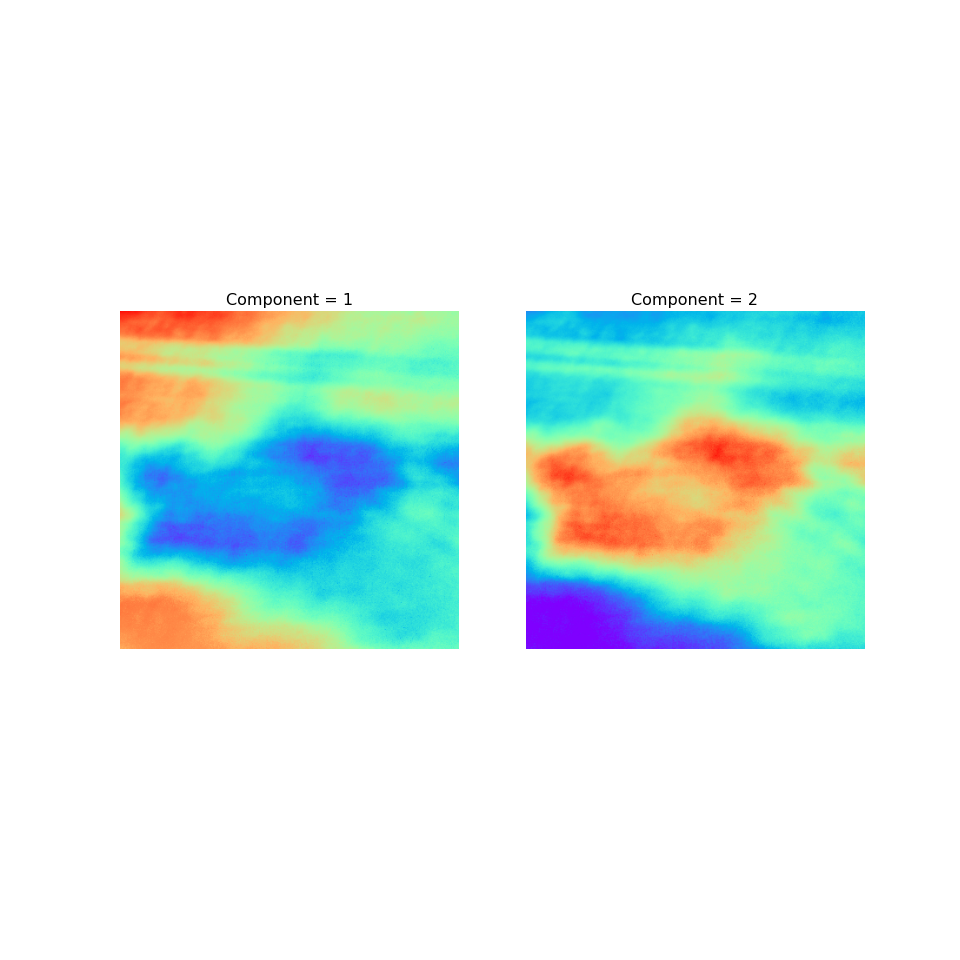

<IPython.core.display.Javascript object>


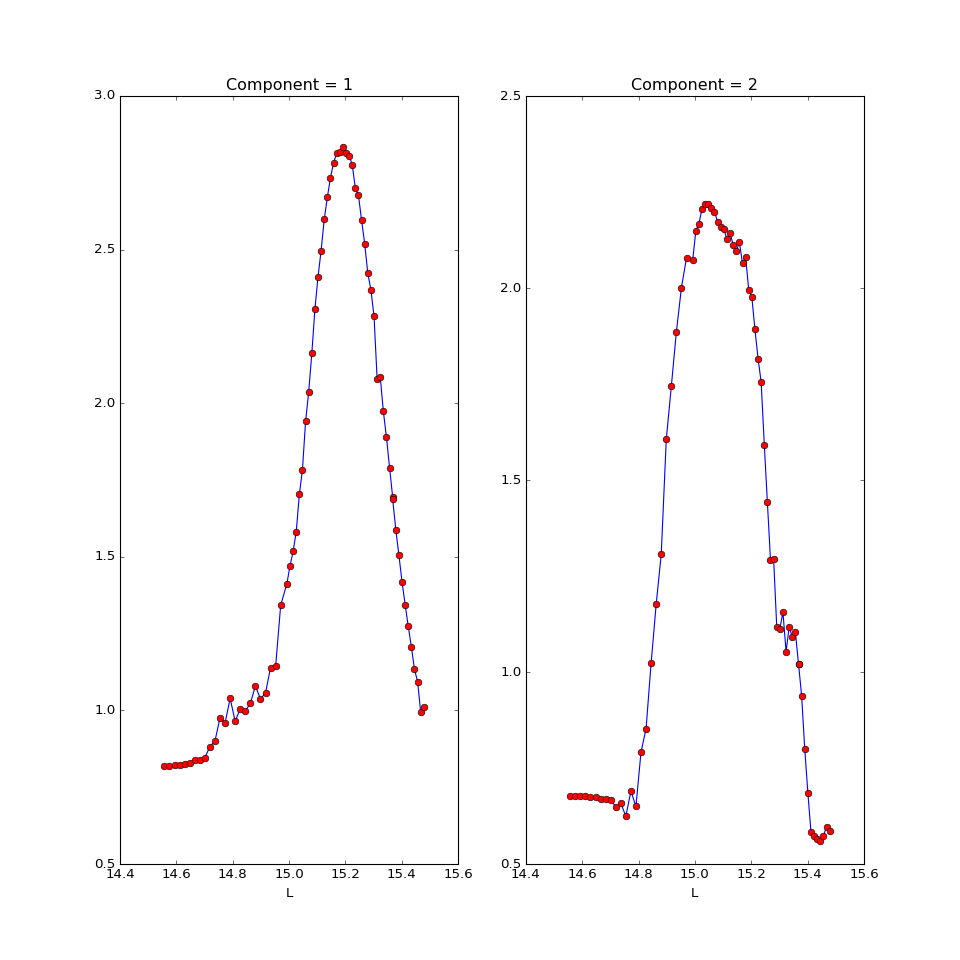

In [16]:
# Same as before, except now use NMF
n_comp = 2
projec, eigenvec, nmf = doNMF(datalog_prep, n_comp, xvals=xvals,xlabel='L',cmap='rainbow')